In [2]:
import sys
sys.path.insert(1, '../')
import nirfasteruff as ff
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Let's load a simple mesh
# There are two ways to load a mesh: from .mat file and from NIRFAST ASCII format (.node, .elem, ...)
# We start with a 2D mesh saved in .mat format
mesh = ff.base.stndmesh()
mesh.from_mat('./circle_stnd')

In [3]:
# Let's look at the fields of mesh: they are exactly the same as the original Matlab version
# Including the one-indexing. Only supports point sources: field fwhm is discarded
# 'vol' is empty now. It's here only as a place holder
print(mesh.__dict__.keys())
print(mesh.source.__dict__.keys())
print(mesh.vol.__dict__.keys())
print('All attibutes of vol are empty. E.g. we can print "xgrid":')
print(mesh.vol.xgrid)

dict_keys(['name', 'nodes', 'bndvtx', 'type', 'mua', 'kappa', 'ri', 'mus', 'elements', 'dimension', 'region', 'source', 'meas', 'link', 'c', 'ksi', 'element_area', 'support', 'vol'])
dict_keys(['fixed', 'num', 'coord', 'int_func'])
dict_keys(['xgrid', 'ygrid', 'zgrid', 'mesh2grid', 'gridinmesh', 'res', 'grid2mesh', 'meshingrid'])
All attibutes of vol are empty. E.g. we can print "xgrid":
[]


In [4]:
# Now let's generate the CW data
data, info = mesh.femdata(0) # In parantheses is the modulation frequency, in Hz
# We can also look at the fields of data and info (convergence information). They are the same as the Matlab version
print(data.__dict__.keys())
print(info.__dict__.keys())

Calculating the MASS matrix
Solving the system
dict_keys(['phi', 'complex', 'link', 'amplitude', 'phase', 'vol'])
dict_keys(['isConverged', 'isConvergedToAbsoluteTolerance', 'iteration', 'residual'])


In [5]:
# If not care about convergence info, this can also be
data, _ = mesh.femdata(0)
# Equivalently, you can also use,
data, info = ff.forward.femdata_stnd_CW(mesh)

Calculating the MASS matrix
Solving the system
Calculating the MASS matrix
Solving the system


In [6]:
# Now we've used only the default parameters. We can choose the solver by setting solver='GPU' or solver='CPU'
# The solver is automatically chosen, but if we use the GPU option on a non-CUDA system, it will give a warning
# And roll back to the CPU solver
data, info = mesh.femdata(0, solver='GPU')

Calculating the MASS matrix
Solving the system


In [7]:
# Of course, we can use the same syntax to get FD data
data, info = mesh.femdata(1e8) # 100MHz modulation
# Now we can see the field phi is complex, and phase is no longer zero
print(data.phi)
print(data.phase)

Calculating the MASS matrix
Solving the system
[[ 2.26248383e-07+7.77623041e-07j  3.78267415e-06+5.77704984e-06j
   7.66294430e-05+5.95447622e-05j ... -5.05834044e-09+1.60228440e-08j
  -6.71057420e-09+3.81155243e-08j  3.04351890e-09+1.38440775e-07j]
 [ 3.09785122e-07+9.53991727e-07j  5.15637617e-06+7.31441640e-06j
   1.08266320e-04+7.79327916e-05j ... -5.22073130e-09+1.72205505e-08j
  -6.74048163e-09+4.31570301e-08j  7.82954269e-09+1.63686034e-07j]
 [ 4.27943202e-07+1.18317633e-06j  7.16342946e-06+9.40085790e-06j
   1.57643423e-04+1.04160300e-04j ... -5.37284038e-09+1.84894900e-08j
  -6.64323887e-09+4.90253817e-08j  1.46872804e-08+1.94911612e-07j]
 ...
 [ 5.77076800e-08+3.49419775e-07j -5.11020081e-09+7.67798405e-08j
  -6.01144551e-09+2.45986990e-08j ...  5.31184830e-04+2.63890334e-04j
   2.02750970e-05+2.10667678e-05j  1.15586510e-06+2.38564377e-06j]
 [ 8.51940231e-08+4.31830084e-07j -3.78455025e-09+9.09377173e-08j
  -6.26692353e-09+2.76689225e-08j ...  8.19352927e-04+3.65729373e-04j


In [8]:
# We can also change the convergence criteria. Let's first have a look at the defaults
solver_opt = ff.utils.SolverOptions()
print(solver_opt.__dict__)

{'max_iter': 1000, 'AbsoluteTolerance': 1e-12, 'RelativeTolerance': 1e-12, 'divergence': 100000000.0, 'GPU': -1}


In [9]:
# Now let's change the RelativeTolerance to 1e-6
solver_opt.RelativeTolerance=1e-6
# Feed it to the solver
data, info = mesh.femdata(0, opt=solver_opt, solver='gpu')
# Check the residual to verify
print(info.residual)
# The solver and convergence arguments are key-value pairs. You can use either, or both (any order), or none

Calculating the MASS matrix
Solving the system
[5.745686220888178e-07, 6.001763313049663e-07, 5.974487572975448e-07, 5.672913004458178e-07, 5.554894434452378e-07, 6.144202071883553e-07, 5.962064182420944e-07, 5.84707788724197e-07, 5.778378872585696e-07, 6.01821699347329e-07, 5.950963085218164e-07, 5.605209401854046e-07, 5.546471193605709e-07, 6.163759297223737e-07, 5.970617337469187e-07, 5.852019651642932e-07]


In [10]:
# We can add the information for converting between mesh space and grid space (.vol)
# Let's make a grid
xgrid = np.arange(-45, 45.5, 1)
ygrid = np.arange(-45, 45.5, 1.5)
mesh.gen_intmat(xgrid, ygrid)
# Now the attributes of vol should be all filled
print(mesh.vol.__dict__)

{'xgrid': array([-45., -44., -43., -42., -41., -40., -39., -38., -37., -36., -35.,
       -34., -33., -32., -31., -30., -29., -28., -27., -26., -25., -24.,
       -23., -22., -21., -20., -19., -18., -17., -16., -15., -14., -13.,
       -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,
        -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.]), 'ygrid': array([-45. , -43.5, -42. , -40.5, -39. , -37.5, -36. , -34.5, -33. ,
       -31.5, -30. , -28.5, -27. , -25.5, -24. , -22.5, -21. , -19.5,
       -18. , -16.5, -15. , -13.5, -12. , -10.5,  -9. ,  -7.5,  -6. ,
        -4.5,  -3. ,  -1.5,   0. ,   1.5,   3. ,   4.5,   6. ,   7.5,
         9. ,  10.5,  12. ,  13.5,  15. ,  16.5,  18. ,  19.5,  21. ,
        22.5,  24. ,

Calculating the MASS matrix
Solving the system
(61, 91, 16)


/tmp/ipykernel_8143/2078817615.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data.phi[:,:,0]),aspect=1.5) # use 1.5 because the stepsize of x and y axes are different


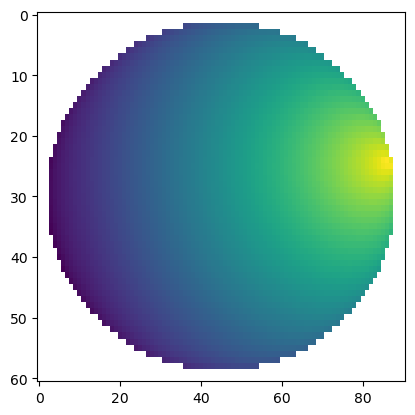

In [11]:
# If we now calculate the forward data again, it will be automatically on the grid
data, _ = mesh.femdata(0)
print(data.phi.shape)
# We can also plot the fluence of the first source to verify
# Use this hack if plt crashes
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.imshow(np.log(data.phi[:,:,0]),aspect=1.5) # use 1.5 because the stepsize of x and y axes are different
plt.show()

In [12]:
# To check if CUDA is available
print(ff.utils.isCUDA())

True


In [13]:
# Here is how to load a mesh stored in ASCII format
mesh = ff.base.stndmesh()
mesh.from_file('slab_stnd')

# Let's calculate the CW data
data,_ = mesh.femdata(0)

Sources integration functions loaded
Detectors integration functions loaded
Calculating the MASS matrix
Solving the system


In [14]:
# We didn't specify a grid yet, so the data is in mesh space still. Look at the shape of phi:
print(data.phi.shape)

(65959, 8)


In [15]:
# Let's change that. First define a grid
xgrid = np.arange(0., 121., 2.)
ygrid = np.arange(0., 121., 2.)
zgrid = np.arange(0., 51., 2.)
mesh.gen_intmat(xgrid, ygrid, zgrid)
# Now we can project data to the grid space
data.togrid(mesh)
# look at the new shape:
print(data.phi.shape)

(61, 61, 26, 8)


/tmp/ipykernel_8143/1788358851.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data.phi[34,:,:,0]).squeeze().T)


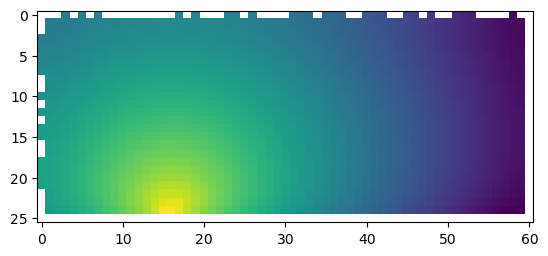

In [16]:
# Let's plot the fluence at source 1
# The boundary voxels may look a little strange, because of the interpolation
# This is because in the mesh, the boundary is not perfect flat. If the interpolation is at the average boundary,
# this kind of ambiguity can happen
plt.imshow(np.log(data.phi[34,:,:,0]).squeeze().T)

In [17]:
# To find out if field .vol is calculated, we have a simple function, for both mesh and data
print(mesh.isvol())
print(mesh.isvol())

True
True


/tmp/ipykernel_8143/528075209.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data.phi[23,:,:,0]).squeeze().T)


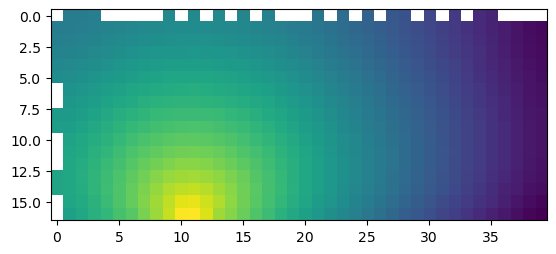

In [18]:
# We can also change the volumetric space. 
# This will generate a warning reminding you that a projection has already been made
xgrid = np.arange(0., 120., 3.)
ygrid = np.arange(0., 120., 3.)
zgrid = np.arange(0., 50., 3.)
mesh.gen_intmat(xgrid, ygrid, zgrid)
data.togrid(mesh)
# plot the new result
plt.imshow(np.log(data.phi[23,:,:,0]).squeeze().T)

In [19]:
# Once we are happy with the mesh, we can save it to the classic ASCII format
mesh.save_nirfast('demo1')